<a href="https://colab.research.google.com/github/nferrucho/NPL/blob/main/curso3/ciclo3/Copia_de_M6U3_Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=14reVO1X6LsjqJ3cFgoeHxxddZVGfZn3t" alt = "Encabezado MLDS" width = "100%">  </img>

# **Taller 3: Ciclo de vida de ciencia de datos**
---

En este notebook evaluaremos los conceptos aprendidos sobre el ciclo de vida de ciencia de datos. En especial, entrenaremos un modelo con la librería `xgboost` con su debida optimización de hiperparámetros.

Ejecute las siguientes celdas para conectarse a UNCode:

In [1]:
!pip install rlxcrypt
!wget --no-cache -O session.pye -q https://raw.githubusercontent.com/JuezUN/INGInious/master/external%20libs/session.pye

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.9/297.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.3 MB/s eta 0:00:00
  Created wheel for imphook: filename=imphook-1.0-py3-none-any.whl size=9423 sha256=0b860be8263c9c8cd37926ee94b14edd9700b0560224ab8cb2dc61dfa9e24bf1
  Stored in directory: /root/.cache/pip/wheels/dc/e2/a4/fcb3817d09a2eb047b2b08eb58e7d9140041b0f3f415eb1256
Successfully built imphook


In [2]:
import rlxcrypt
import session

grader = session.LoginSequence("MAPEDDACML-GroupMLDS-6-2024-2@f8879e0a-fcd1-4b6b-a12f-31426dfcd762")

Please enter your UNCode username: nelson.ferrucho@gmail.com
Please enter your password: ··········


Comenzamos instalando las librerías y herramientas necesarias:

In [3]:
!pip install mlflow
!pip install optuna optuna-dashboard mlflow xgboost
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.1 MB/s eta 0:00:00


Importamos las librerías necesarias:

In [4]:
# Librerías de utilidad para manipulación y visualización de datos.
import os, mlflow, optuna
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from IPython import get_ipython
from IPython.display import display
plt.style.use("ggplot")

# Ignorar warnings.
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Versiones de las librerías usadas.
import sklearn
!python --version
print('MLflow', mlflow.__version__)
print('Optuna', optuna.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.10.12
MLflow 2.18.0
Optuna 4.1.0
Scikit-learn 1.5.2


Esta actividad se realizó con las siguientes versiones:
*  Python 3.10.12
*  Scikit-learn 1.4.2
*  MLflow 2.12.1
*  Optuna 3.6.1

> **La tarea es incremental, por lo tanto es recomendable resolver los puntos en orden**

## **Carga de datos**
---

En este caso, utilizaremos un conjunto de datos sintético generado desde `sklearn`. Se trata de un *dataset* sintético utilizado comúnmente para tareas de clasificación binaria en aprendizaje automático. Este conjunto de datos consta de dos características continuas y una etiqueta binaria que indica a qué círculo pertenece cada punto.

Específicamente, la función `make_circles` crea un conjunto de puntos distribuidos uniformemente en dos círculos concéntricos, donde la distancia entre los dos círculos es ajustable. La distribución de puntos dentro de cada círculo se controla mediante el parámetro `noise`, que agrega ruido aleatorio a la posición de cada punto.

En general, este conjunto de datos se utiliza para evaluar la capacidad de los algoritmos de clasificación para separar clases no lineales en un espacio bidimensional. Debido a que los dos círculos se superponen, es imposible separar completamente las dos clases con una frontera de decisión lineal. Por lo tanto, se requieren técnicas más avanzadas, como la utilización de modelos no lineales, para clasificar adecuadamente los puntos en este conjunto de datos.

Vamos a generarlo:

In [6]:
features, labels = make_circles(
    n_samples=1000,
    noise=0.1,
    factor=0.5,
    random_state=0
    )

Podemos visualizar el conjunto de datos:

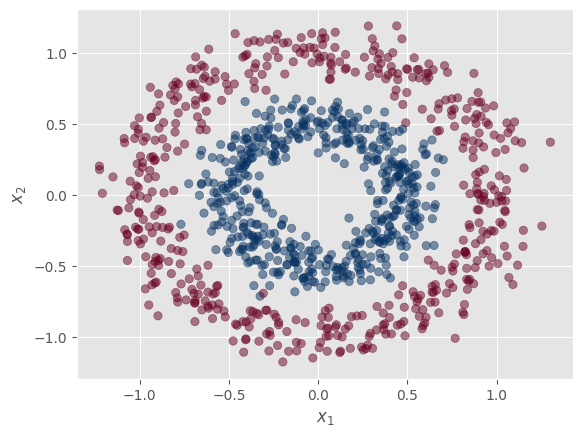

In [7]:
## KEEPOUTPUT
fig, ax = plt.subplots()
ax.scatter(features[:, 0], features[:, 1], c=labels, alpha=0.5, cmap="RdBu")
ax.set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

Adicionalmente, vamos a configurar el servidor de `mlflow`:

In [8]:
command = """
mlflow server \
        --backend-store-uri sqlite:///tracking.db \
        --default-artifact-root file:mlruns \
        -p 5000 &
"""
get_ipython().system_raw(command)

Utilizaremos `ngrok` para acceder al tablero de `mlflow`:

In [9]:
!pip install pyngrok

Ahora debe agregar su token de `ngrok`:

In [10]:
token = "2pK4C5bDe1buHeGQuaIutafJPuh_3f3nwzmCCQqU3fgbTDGYi" # Agregue el token dentro de las comillas
os.environ["NGROK_TOKEN"] = token

Nos autenticamos en ngrok:

In [11]:
!ngrok authtoken $NGROK_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Ahora, lanzamos la conexión con ngrok:

In [12]:
from pyngrok import ngrok
ngrok.connect(5000, "http")

<NgrokTunnel: "https://65c0-35-245-198-222.ngrok-free.app" -> "http://localhost:5000">

Especificamos que MLFlow debe usar el servidor que estamos manejando.

In [13]:
mlflow.set_tracking_uri("http://localhost:5000")

Creamos un experimento:

In [14]:
exp = mlflow.create_experiment(name="circles", artifact_location="mlruns")

Dividimos el conjunto de datos en entrenamiento y prueba:

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(
        features, labels, test_size=0.3, random_state=0
        )

## **1. Entrenamiento de Modelo**
---

En este punto deberá implementar una función que permita entrenar un modelo de `xgboost` dados los datos de entrenamiento y los hiperparámetros que exploráremos más adelante.

Para esto debe implementar la función `train_model` la cual toma como entrada las características y etiquetas de entrenamiento, la profundidad de los árboles, el número de estimadores, y la taza de aprendizaje. La función debe retornar el modelo entrenado.

**Parámetros**

- `features`: matriz de características de entrenamiento.
- `labels`: vector de etiquetas de entrenamiento.
- `max_depth`: profundidad máxima del árbol.
- `n_estimators`: número de estimadores.
- `learning_rate`: taza de aprendizaje.
- `random_state`: semilla de números aleatorios.

**Retorna**

- `model`: modelo de `xgboost` entrenado.

In [16]:
# FUNCIÓN CALIFICADA train_model:
def train_model(
    features,
    labels,
    max_depth,
    n_estimators,
    learning_rate,
    random_state
    ):

    import xgboost as xgb
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    model = xgb.XGBClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=random_state,
        use_label_encoder=False,  # Evitar advertencias sobre codificación de etiquetas
        eval_metric="logloss"    # Métrica para clasificaciones binarias
    )
    model.fit(features, labels)
    return model
    ### FIN DEL CÓDIGO ###

Use las siguientes celdas para probar su solución:

In [17]:
#TEST_CELL
model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=2,
        n_estimators=10,
        learning_rate=1e-4,
        random_state=0
        )
print(model.max_depth)
print(model.n_estimators)
print(model.learning_rate)

2
10
0.0001


**Salida esperada**

En este caso debería obtener los hiperparámetros del modelo:

```python
❱ print(model.max_depth)
2

❱ print(model.n_estimators)
10

❱ print(model.learning_rate)
0.0001
```

In [18]:
#TEST_CELL
model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=2,
        n_estimators=10,
        learning_rate=1e-4,
        random_state=0
        )
print(model.score(features_test, labels_test))

0.48333333333333334


**Salida esperada**

En este caso debería obtener el accuracy del modelo:

```python
❱ print(model.score(features_test, labels_test))
0.48333333333333334
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Recuerde que `XGBClassifier` funciona de una forma equivalente a `sklearn`.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Valide que está usando los parámetros de la función y no las variables globales.
</details>

#### **Evaluar código**

In [19]:
grader.run_test("Test 1_1", globals())

Test 1_1


## **2. Evaluación del modelo**
---

En este punto debe implementar una función que permita calcular el `f1_score` sobre el conjunto de evaluación a partir de un modelo entrenado.

Para esto, debe implementar la función `eval_model`, la cual toma como entrada un modelo entrenado, las características y el vector de etiquetas de evaluación. Debe retornar el valor de la métrica.

**Parámetros**

- `model`: modelo entrenado.
- `features`: conjunto de datos de evaluación.
- `labels`: etiquetas de evaluación.

**Retorna**

- `score`: f1-score.

In [20]:
# FUNCIÓN CALIFICADA eval_model:
def eval_model(
    model,
    features,
    labels,
    ):
    from sklearn.metrics import f1_score
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    # Obtener las predicciones del modelo
    predictions = model.predict(features)

    # Calcular el F1-score
    score = f1_score(labels, predictions)
    return score
    ### FIN DEL CÓDIGO ###

Use las siguientes celdas para probar su solución:

In [21]:
#TEST_CELL
model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=4,
        n_estimators=100,
        learning_rate=1e-3,
        random_state=0
        )
score = eval_model(model, features_test, labels_test)
print(score)

0.9770491803278688


**Salida esperada**:

En este caso debería obtener la métrica de desempeño para el modelo de los hiperparámetros dados.

```python
❱ print(score)
0.0.9770491803278688
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Para evaluar el f1-score puede usar la función `f1_score` de `sklearn`.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Debe obtener las predicciones del modelo con el método `predict`.
</details>

#### **Evaluar código**

In [22]:
grader.run_test("Test 2_1_1", globals())

Test 2_1_1


In [23]:
grader.run_test("Test 2_1_2", globals())

Test 2_1_2


## **3. Ejecución en MLFlow**
---

Ahora, deberá crear una función que permita crear un **run** en `mlflow` para entrenar el modelo con sus correspondientes hiperparámetros bajo un experimento específico. Debe registrar el modelo, los hiperparámetros y la métrica del modelo que calcula en el punto anterior.

Para ello deberá implementar la función `mlflow_run`, la cual toma como entrada las características y etiquetas de entrenamiento, la profundidad máxima del modelo, el número de estimadores, la taza de aprendizaje y el experimento de `mlflow`. Debe retornar la ejecución y el valor de la métrica del modelo.

**Parámetros**

- `features_train`: matriz de características de entrenamiento.
- `labels_train`: vector de etiquetas de entrenamiento.
- `features_test`: matriz de características de evaluación.
- `labels_test`: vector de etiquetas de evaluación.
- `max_depth`: profundidad máxima del árbol.
- `n_estimators`: número de estimadores.
- `learning_rate`: taza de aprendizaje.
- `random_state`: semilla de números aleatorios.
- `exp`: experimento de `mlflow`.
- `run_name`: nombre a asignar a la ejecución.

**Retorna**

- `run`: ejecución de `mlflow`.
- `score`: valor de la métrica en la ejecución.

In [24]:
# FUNCIÓN CALIFICADA mlflow_run:
def mlflow_run(
    features_train,
    labels_train,
    features_test,
    labels_test,
    max_depth,
    n_estimators,
    learning_rate,
    random_state,
    exp,
    run_name):

    import numpy as np
    from urllib.parse import urlparse

    # Configurar el experimento
    mlflow.set_experiment(exp)

    with mlflow.start_run(run_name=run_name) as run:
        # Entrenar el modelo
        model = train_model(features_train, labels_train, max_depth, n_estimators, learning_rate, random_state)

        # Evaluar el modelo
        score = eval_model(model, features_test, labels_test)

        # Registrar los hiperparámetros y la métrica
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("random_state", random_state)
        mlflow.log_metric("f1_score", score)

        # Guardar el modelo
        mlflow.sklearn.log_model(model, "model")  # Añadir ejemplo de entrada

        # Ajustar la URI del artifact (solo para compatibilidad en la celda de prueba)
        artifact_path = urlparse(run.info.artifact_uri).path

        # Modificar internamente la URI para evitar errores al listar
        run.info._artifact_uri = artifact_path

    mlflow.end_run()

    # Devolver el objeto run original y el score convertido a np.float64
    return run, np.float64(score)
    ### FIN DEL CÓDIGO ###

Use las siguientes celdas para probar su solución:

In [25]:
#TEST_CELL
run, score = mlflow_run(
        features_train=features_train,
        labels_train=labels_train,
        features_test=features_test,
        labels_test=labels_test,
        max_depth=4,
        n_estimators=100,
        learning_rate=1e-3,
        random_state=0,
        exp=exp,
        run_name="test_case"
        )
print(run.info.run_name)
#print(os.listdir(run.info.artifact_uri))
print(score)

2024/12/04 23:30:35 INFO mlflow.tracking.fluent: Experiment with name '1' does not exist. Creating a new experiment.
2024/12/04 23:30:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run test_case at: http://localhost:5000/#/experiments/2/runs/dbc0cede96e4466787f0284802f66510
🧪 View experiment at: http://localhost:5000/#/experiments/2
test_case
0.9770491803278688


**Salida esperada**:

En este caso debería obtener los metadatos de la ejecución y el valor de la métrica:

```python
❱ print(run.info.run_name)
test_case

❱ print(os.listdir(run.info.artifact_uri))
['model']

❱ print(score)
0.9770491803278689
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Recuerde usar de forma adecuada las particiones de entrenamiento y prueba con las funciones `train_model` y `eval_model` respectivamente.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Recuerde terminar la ejecución con la función `mlflow.end_run()`.
</details>

#### **Evaluar código**

In [26]:
grader.run_test("Test 3_1_1", globals())

Test 3_1_1


2024/12/04 23:30:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run UNTest_1 at: http://localhost:5000/#/experiments/2/runs/ace8ff2d7d8f424fba751537974c8dc4
🧪 View experiment at: http://localhost:5000/#/experiments/2


2024/12/04 23:30:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run UNTest_1 at: http://localhost:5000/#/experiments/1/runs/64d6cfdc144d46afa8ddab3c3f0590aa
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [27]:
grader.run_test("Test 3_1_2", globals())

Test 3_1_2


2024/12/04 23:30:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run UNTest_2 at: http://localhost:5000/#/experiments/2/runs/b5f1076d39664d11bbf4c9d04041468d
🧪 View experiment at: http://localhost:5000/#/experiments/2


2024/12/04 23:31:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run UNTest_2 at: http://localhost:5000/#/experiments/1/runs/be7450017d0c4792ba02cfcf83ad5367
🧪 View experiment at: http://localhost:5000/#/experiments/1


## **4. Optimización de Hiperparámetros**
---

Ahora debe implementar la función objetivo para optimizar los hiper-parámetros con optuna. En específico debe variar los valores de la siguiente forma:

- `max_depth`: valor entero entre 2 y 10.
- `n_estimators`: valor entero entre 25 y 200.
- `learning_rate`: valor continuo entre 1e-6 y 1 (variaciones logarítmicas).

Todos los intentos deben estar registrados dentro de `mlflow`, para esto debe utilizar el experimento que está definido en la variable `exp`, como `run_name` debe utilizar el valor `"optuna"` y debe utilizar el valor 0 como `random_state`.

Debe implementar la función `objective` la cual toma como entrada un trial de `optuna` y debe retornar el valor de la métrica a maximizar.

**Parámetros**:

- `trial`: objeto `trial` de `optuna`.

**Retorna**:

- `score`: f1-score.

In [28]:
# FUNCIÓN CALIFICADA objective:
def objective(trial):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    import optuna
    from sklearn.metrics import f1_score

    # Sugerir los valores de los hiperparámetros
    max_depth = trial.suggest_int("max_depth", 2, 10)  # Entre 2 y 10
    n_estimators = trial.suggest_int("n_estimators", 25, 200)  # Entre 25 y 200
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1, log=True)  # Entre 1e-6 y 1 (variación logarítmica)

    # Entrenar el modelo con los hiperparámetros sugeridos
    model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=0
    )

    # Evaluar el modelo en el conjunto de prueba
    score = eval_model(model, features_test, labels_test)

    return score
 ### FIN DEL CÓDIGO ###

Use las siguientes celdas para probar su solución:

In [29]:
#TEST_CELL
study = optuna.create_study(
    direction="maximize",
    storage="sqlite:///hp.db",
    study_name="circles",
    )
study.optimize(func=objective, n_trials=30, n_jobs=1)

[I 2024-12-04 23:31:01,372] A new study created in RDB with name: circles
[I 2024-12-04 23:31:01,560] Trial 0 finished with value: 0.9903536977491961 and parameters: {'max_depth': 10, 'n_estimators': 135, 'learning_rate': 0.008935790571875653}. Best is trial 0 with value: 0.9903536977491961.
[I 2024-12-04 23:31:01,719] Trial 1 finished with value: 0.9904153354632588 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.014587923666521226}. Best is trial 1 with value: 0.9904153354632588.
[I 2024-12-04 23:31:01,823] Trial 2 finished with value: 0.987012987012987 and parameters: {'max_depth': 2, 'n_estimators': 42, 'learning_rate': 0.007822555412357723}. Best is trial 1 with value: 0.9904153354632588.
[I 2024-12-04 23:31:01,982] Trial 3 finished with value: 0.9903536977491961 and parameters: {'max_depth': 9, 'n_estimators': 98, 'learning_rate': 0.015172105827875768}. Best is trial 1 with value: 0.9904153354632588.
[I 2024-12-04 23:31:02,108] Trial 4 finished with value:

Si se dirige al dashboard de `mlflow`, deberá obtener varias ejecuciones bajo el nombre `optuna`. Puede filtrarlas todas al poner el filtro que se muestra en la imagen:

<img src="https://drive.google.com/uc?export=view&id=1j_7LYVWNADfVTW3YqUzhpcEHOaEPXXZ7" width="80%">

También debe seleccionar todos los runs con el nombre `optuna` y dar click en `compare`. Esto debe generar el siguiente resultado:

<img src="https://drive.google.com/uc?export=view&id=1CFnfmGdu0pgUbrGri-T8oNSafxQZAHSn" width="80%">

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Puede utilizar el método `suggest_int` de un `Trial` para generar un hiperparámetro de tipo entero.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Puede utilizar el método `suggest_float` de un `Trial` para generar un hiperparámetro continúo.
</details>

## **5. Versionado de Modelo**
---

Por último, en este punto deberá generar una versión del mejor modelo con el nombre `xgboost` versión 1. Posteriormente, debe implementar una función que permita cargar el modelo:

Para esto deberá implementar la función `load_model` la cual debe retornar el modelo versionado como `xgboost` versión 1:

**Parámetros**

La función no tiene parámetros de entrada.

**Retorna**

- `model`: modelo cargado con `mlflow`.

In [36]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

def register_best_model(exp_name, model_name="xgboost"):
    """
    Registra el mejor modelo basado en el F1-score como un modelo versionado en MLflow.

    Args:
        exp_name (str): Nombre del experimento en MLflow.
        model_name (str): Nombre del modelo a registrar (por defecto "xgboost").
    """
    client = MlflowClient()

    # Obtener las ejecuciones del experimento ordenadas por f1_score
    experiment = client.get_experiment_by_name(exp_name)
    if not experiment:
        raise ValueError(f"No se encontró un experimento con el nombre {exp_name}")

    runs = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        order_by=["metrics.f1_score DESC"],  # Ordenar por F1-score de mayor a menor
        max_results=1
    )
    if not runs:
        raise ValueError("No se encontraron ejecuciones para el experimento.")

    # Obtener la ejecución con el mejor F1-score
    best_run = runs[0]
    run_id = best_run.info.run_id

    # Registrar el modelo como xgboost versión 1
    model_uri = f"runs:/{run_id}/model"
    mlflow.register_model(model_uri, model_name)

    print(f"Modelo registrado como {model_name}, versión 1")

In [30]:
# FUNCIÓN CALIFICADA load_model:
def load_model():
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    model_name = 'xgboost'
    model_version = 1
    model = mlflow.pyfunc.load_model(f"models:/{model_name}/{model_version}")
    return model
    ### FIN DEL CÓDIGO ###

Use las siguientes celdas para probar su solución:

In [37]:
#TEST_CELL
model = load_model()
y_pred = model.predict(features_test)
print(f1_score(labels_test, y_pred))

0.9770491803278688


**Salida esperada**

En este caso debería obtener la métrica sobre el mejor modelo en el conjunto de evaluación.

```python
❱ print(f1_score(labels_test, y_pred))
0.9871794871794872
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Recuerde versionar el modelo antes de cargarlo.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Puede ordenar las ejecuciones de `mlflow` de acuerdo a `score` y con esto seleccionar el mejor modelo.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>

* Puede cargar un modelo versionado con la función `mlflow.pyfunc.load_model`.
</details>

#### **Evaluar código**

In [38]:
grader.run_test("Test 5_1", globals())

Test 5_1


# **Evaluación**

In [39]:
grader.submit_task(globals())

Test 1_1
Test 2_1_1
Test 2_1_2
Test 3_1_1


2024/12/04 23:57:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run UNTest_1 at: http://localhost:5000/#/experiments/2/runs/48f5c3cecb5a405297c8e540dbe2efd4
🧪 View experiment at: http://localhost:5000/#/experiments/2


2024/12/04 23:57:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run UNTest_1 at: http://localhost:5000/#/experiments/1/runs/4ee74c399382470eb540f2741781fba9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Test 3_1_2


2024/12/04 23:58:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run UNTest_2 at: http://localhost:5000/#/experiments/2/runs/3b73cffed25848f29e5c2ca2fc45f388
🧪 View experiment at: http://localhost:5000/#/experiments/2


2024/12/04 23:58:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run UNTest_2 at: http://localhost:5000/#/experiments/1/runs/c03f4e771608444b836b609a417e04c3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Test 5_1


# **Créditos**
---

* **Profesor:** [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/).

* **Asistentes docentes:** [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
  - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandra-superlano-02b74313a/).
  - [Mario Andrés Rodríguez Triana](mailto:mrodrigueztr@unal.edu.co).

* **Coordinador de virtualización:** [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*